# Twitter Sentiment Analysis Using  TextBlob

This project will:

- Fetch live tweets using Twitter API v2 (Tweepy).

- Perform sentiment analysis (positive, negative, neutral) using TextBlob.

- Display the results with polarity scores

🛠️ How It Works?

- TextBlob assigns a polarity score:

- > 0 → Positive

- < 0 → Negative

- = 0 → Neutral

### Visualize Sentiment Results

Enter keyword to search tweets:  ai


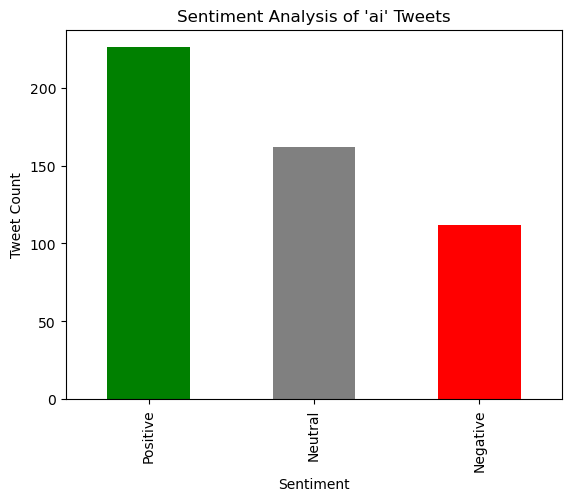

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", header=None)

# Assign column names based on dataset structure
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Function to filter tweets based on a keyword
def get_tweets_from_csv(keyword, count=100):
    filtered_tweets = df[df["text"].str.contains(keyword, case=False, na=False)]
    return filtered_tweets["text"].sample(n=min(count, len(filtered_tweets))).tolist()

# Function to analyze sentiment
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Function to plot sentiment analysis results
def plot_sentiments(sentiments, keyword):
    sentiment_counts = pd.Series(sentiments).value_counts()
    sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
    plt.xlabel("Sentiment")
    plt.ylabel("Tweet Count")
    plt.title(f"Sentiment Analysis of '{keyword}' Tweets")
    plt.show()

# Input keyword from user
keyword = input("Enter keyword to search tweets: ")

# Fetch tweets
tweets = get_tweets_from_csv(keyword, count=500)
if len(tweets) == 0:
    print("No tweets found. Try a different keyword.")
else:
    # Perform sentiment analysis
    sentiments = [analyze_sentiment(tweet) for tweet in tweets]

    # Plot results
    plot_sentiments(sentiments, keyword)


Enter keyword to search tweets:  ai


TWEET: mm.. dairy queen..brownie earthquake! how fattning, sooo good 
SENTIMENT: Positive

TWEET: @chadxmerch hahah I though you said &quot;James lit his beard on fire&quot; darn 
SENTIMENT: Neutral

TWEET: @DonnieWahlberg will u know what iÂ´m feelinÂ´today???hurts in my left knee...but canÂ´t accept it  only 6 days to wait...
SENTIMENT: Neutral

TWEET: can't find any nice words for a .tel domain http://wortsuchen.de/ends-with-by-length/tel/ haha 
SENTIMENT: Positive

TWEET: Major leak in the gym's roof yesterday. Thought when I moved I wouldn't be wondering every time it rained hard if I'd be soaking up water 
SENTIMENT: Negative



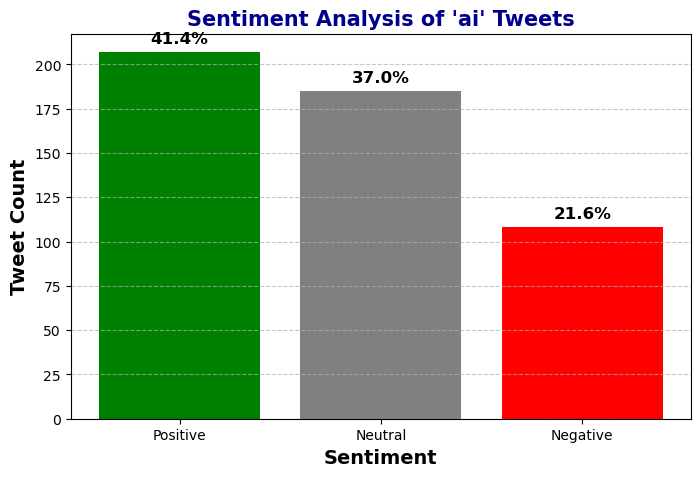

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load dataset
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Function to fetch tweets
def get_tweets_from_csv(keyword, count=100):
    filtered_tweets = df[df["text"].str.contains(keyword, case=False, na=False)]
    return filtered_tweets["text"].sample(n=min(count, len(filtered_tweets))).tolist()

# Function to analyze sentiment
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"


def plot_sentiments(sentiments, keyword):
    """
    Improved visualization for sentiment analysis.
    """
    sentiment_counts = pd.Series(sentiments).value_counts()
    
    # Colors for better visualization
    colors = {"Positive": "green", "Neutral": "gray", "Negative": "red"}
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(sentiment_counts.index, sentiment_counts.values, 
                   color=[colors[label] for label in sentiment_counts.index])
    
    # Add percentage labels above bars
    total = sum(sentiment_counts.values)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, 
                 f"{(yval/total)*100:.1f}%", ha="center", fontsize=12, fontweight="bold")
    
    plt.xlabel("Sentiment", fontsize=14, fontweight="bold")
    plt.ylabel("Tweet Count", fontsize=14, fontweight="bold")
    plt.title(f"Sentiment Analysis of '{keyword}' Tweets", fontsize=15, fontweight="bold", color="darkblue")
    
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


# User input
keyword = input("Enter keyword to search tweets: ")

# Fetch tweets
tweets = get_tweets_from_csv(keyword, count=500)

if len(tweets) == 0:
    print("No tweets found. Try a different keyword.")
else:
    # Perform sentiment analysis
    sentiments = [analyze_sentiment(tweet) for tweet in tweets]

    # Display sample results
    for tweet, sentiment in zip(tweets[:5], sentiments[:5]):  
        print(f"TWEET: {tweet}\nSENTIMENT: {sentiment}\n")

    # Plot results
    plot_sentiments(sentiments, keyword)


In [72]:
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
